In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

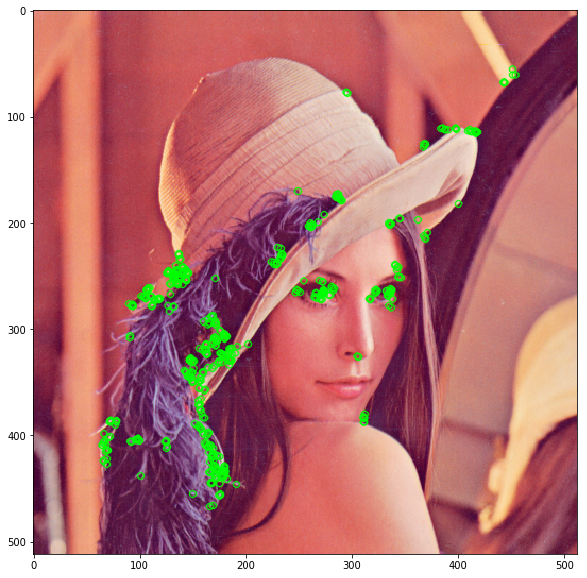

In [51]:
img_color = cv2.imread('../02_geometria/Lenna.png')

img = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)

# Initiate STAR detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img_color,kp,cv2.DRAW_MATCHES_FLAGS_DEFAULT,color=(0,255,0), flags=0)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

# Feature Matching

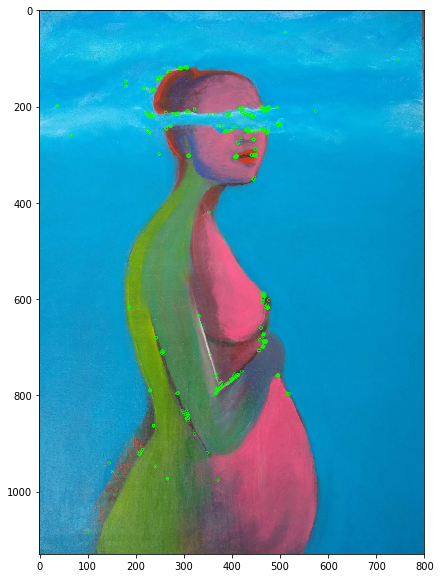

In [52]:
img1_color = cv2.imread('maternidad_small.jpg')          # queryImage
img2_color = cv2.imread('fondo.jpg') # trainImage

img1 = cv2.cvtColor(img1_color,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2_color,cv2.COLOR_BGR2GRAY)

# Initiate ORB detector
#orb = cv2.ORB()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)


# draw only keypoints location,not size and orientation
img_points = cv2.drawKeypoints(img1_color,kp1,cv2.DRAW_MATCHES_FLAGS_DEFAULT,color=(0,255,0), flags=0)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_points, cv2.COLOR_BGR2RGB))
plt.show()

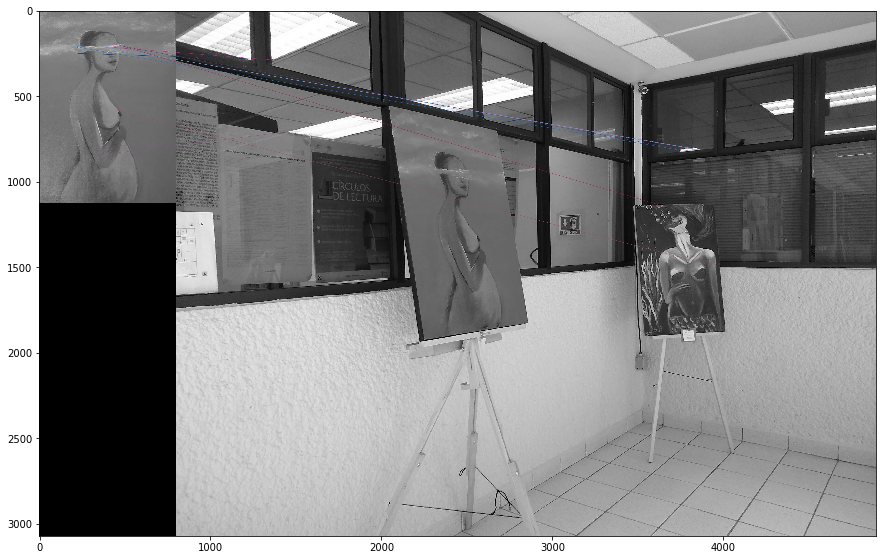

In [50]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], img3, flags=2)

plt.figure(figsize=(15, 12))
plt.imshow(img3)
plt.show()